In [1]:
!pip install numpy matplotlib pysochrone 

Defaulting to user installation because normal site-packages is not writeable
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
  Created wheel for pysochrone: filename=pysochrone-0.1.1-cp311-none-win_amd64.whl size=1512235 sha256=380334e22d8b995bd15b0e3c329f0d5d0d9ad6d7f3e660a686abacbe42fcdfc0
  Stored in directory: c:\users\sithaarth m\appdata\local\pip\cache\wheels\38\4c\20\ed5842c69dafbdfebefc3d45316c0f6ca347b0bee0766718bc
Successfully built pysochrone


In [2]:
!pip install pysochrone networkx numpy matplotlib geopy

Defaulting to user installation because normal site-packages is not writeable
  Obtaining dependency information for geopy from https://files.pythonhosted.org/packages/e5/15/cf2a69ade4b194aa524ac75112d5caac37414b20a3a03e6865dfe0bd1539/geopy-2.4.1-py3-none-any.whl.metadata
  Obtaining dependency information for geographiclib<3,>=1.52 from https://files.pythonhosted.org/packages/9f/5a/a26132406f1f40cf51ea349a5f11b0a46cec02a2031ff82e391c2537247a/geographiclib-2.0-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/125.4 kB ? eta -:--:--
   --- ------------------------------------ 10.2/125.4 kB ? eta -:--:--
   --- ------------------------------------ 10.2/125.4 kB ? eta -:--:--
   ------------------------- ------------- 81.9/125.4 kB 770.8 kB/s eta 0:00:01
   ---------------------------- ---------- 92.2/125.4 kB 655.4 kB/s eta 0:00:01
   ---------------------------------- --- 112.6/125.4 kB 656.4 kB/s eta 0:00:01
   -------------------------------------- 125.4/125.4 

Start Node: (13.0, 80.0)
End Node: (-6.0, 107.0)
Route from Chennai Port to Jakarta Port:
(13.0, 80.0)
(13.0, 81.0)
(13.0, 82.0)
(13.0, 83.0)
(13.0, 84.0)
(13.0, 85.0)
(13.0, 86.0)
(13.0, 87.0)
(13.0, 88.0)
(12.0, 89.0)
(11.0, 90.0)
(10.0, 91.0)
(9.0, 92.0)
(8.0, 93.0)
(7.0, 94.0)
(6.0, 95.0)
(5.0, 96.0)
(4.0, 97.0)
(3.0, 98.0)
(2.0, 99.0)
(1.0, 100.0)
(0.0, 101.0)
(-1.0, 102.0)
(-2.0, 103.0)
(-3.0, 104.0)
(-4.0, 105.0)
(-5.0, 106.0)
(-6.0, 107.0)


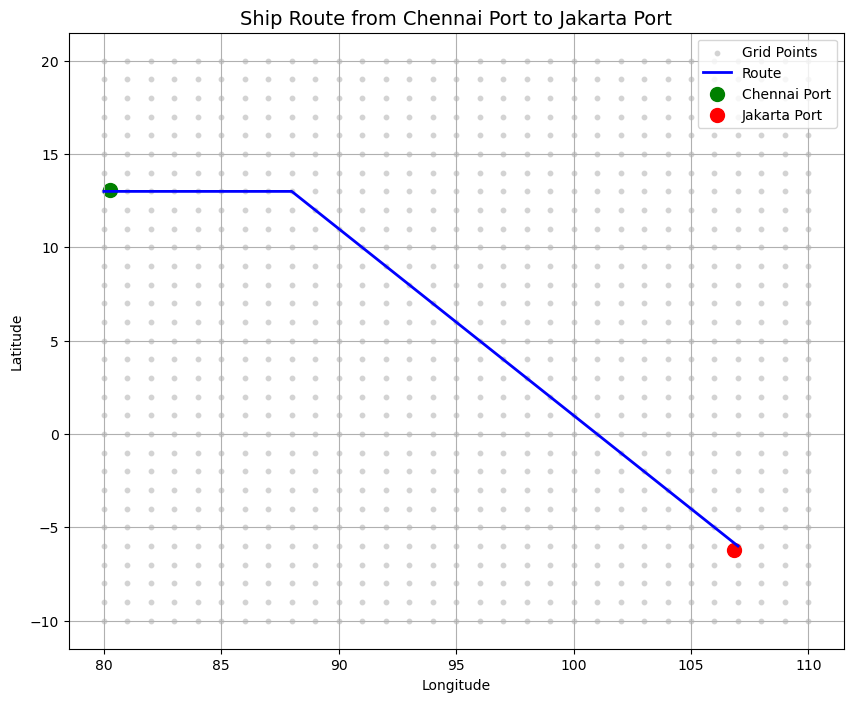

In [3]:
import pysochrone as psc
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
from geopy.distance import great_circle

# Define the start and end ports with their coordinates
START_PORT = {
    'name': 'Chennai Port',
    'lat': 13.0827,
    'lon': 80.2707
}

END_PORT = {
    'name': 'Jakarta Port',
    'lat': -6.2088,
    'lon': 106.8456
}

# Define grid resolution
LAT_RESOLUTION = 1.0  # degrees
LON_RESOLUTION = 1.0  # degrees

# Create latitude and longitude ranges
latitudes = np.arange(-10, 20 + LAT_RESOLUTION, LAT_RESOLUTION)  # From 10°S to 20°N
longitudes = np.arange(80, 110 + LON_RESOLUTION, LON_RESOLUTION)  # From 80°E to 110°E

# Create grid nodes
nodes = []
for lat in latitudes:
    for lon in longitudes:
        nodes.append((lat, lon))

# Initialize the graph
G = nx.Graph()

# Add nodes to the graph
for node in nodes:
    G.add_node(node)

# Define possible movements (8-connected grid)
MOVEMENTS = [(-1, 0),  # South
            (-1, 1),  # Southeast
            (0, 1),   # East
            (1, 1),   # Northeast
            (1, 0),   # North
            (1, -1),  # Northwest
            (0, -1),  # West
            (-1, -1)] # Southwest

# Add edges with weights based on great-circle distance
for node in nodes:
    lat, lon = node
    for move in MOVEMENTS:
        neighbor_lat = lat + move[0] * LAT_RESOLUTION
        neighbor_lon = lon + move[1] * LON_RESOLUTION
        neighbor = (neighbor_lat, neighbor_lon)
        if neighbor in G.nodes:
            distance = great_circle((lat, lon), neighbor).nautical  # Distance in nautical miles
            # For simplicity, weight is distance. You can modify this to include other factors like currents.
            G.add_edge(node, neighbor, weight=distance)

# Function to find the nearest grid node to a given coordinate
def find_nearest_node(lat, lon):
    nearest_node = min(G.nodes, key=lambda node: great_circle((lat, lon), node).meters)
    return nearest_node

# Find start and end nodes
start_node = find_nearest_node(START_PORT['lat'], START_PORT['lon'])
end_node = find_nearest_node(END_PORT['lat'], END_PORT['lon'])

print(f"Start Node: {start_node}")
print(f"End Node: {end_node}")

# Implement a simple isochrone calculation using Pysochrone
# For demonstration, we'll assume a constant speed and calculate reachable nodes
# However, for routing, we'll proceed with Dijkstra's algorithm

# Compute the shortest path using Dijkstra's algorithm
try:
    path = nx.dijkstra_path(G, start_node, end_node, weight='weight')
    print(f"Route from {START_PORT['name']} to {END_PORT['name']}:")
    for step in path:
        print(step)
except nx.NetworkXNoPath:
    print("No path found between the specified ports.")

# Extract latitudes and longitudes for plotting
route_lats = [node[0] for node in path]
route_lons = [node[1] for node in path]

# Plot the route on a simple map
plt.figure(figsize=(10, 8))
plt.title(f"Ship Route from {START_PORT['name']} to {END_PORT['name']}", fontsize=14)

# Plot all nodes as light grey dots
all_lats = [node[0] for node in G.nodes]
all_lons = [node[1] for node in G.nodes]
plt.scatter(all_lons, all_lats, color='lightgrey', s=10, label='Grid Points')

# Plot the route
plt.plot(route_lons, route_lats, color='blue', linewidth=2, label='Route')

# Mark start and end points
plt.scatter(START_PORT['lon'], START_PORT['lat'], color='green', s=100, label=START_PORT['name'])
plt.scatter(END_PORT['lon'], END_PORT['lat'], color='red', s=100, label=END_PORT['name'])

plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend()
plt.grid(True)
plt.show()


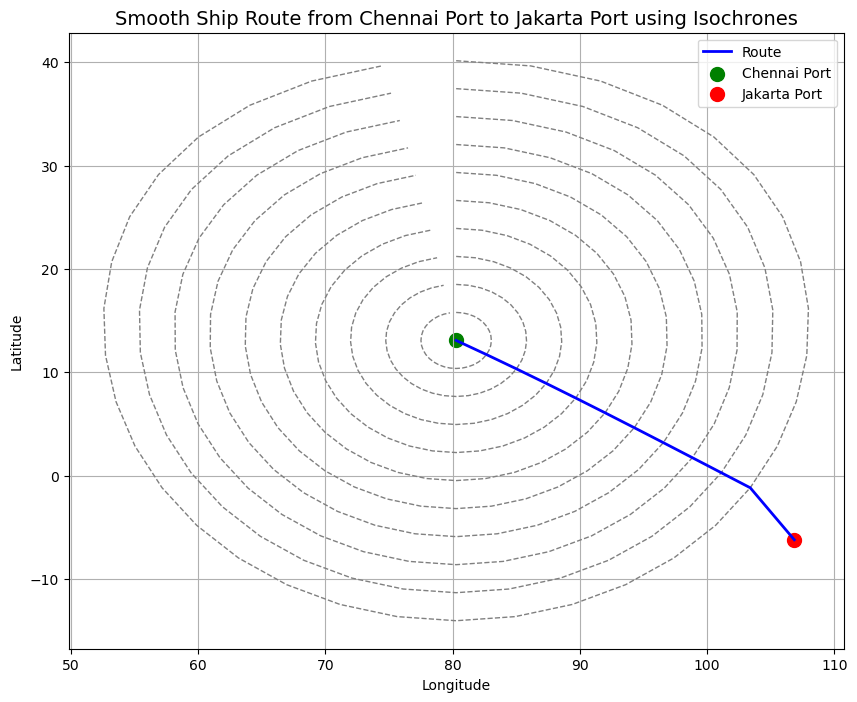

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from geopy.distance import geodesic
from geopy.point import Point
import math

# Define the start and end ports with their coordinates
START_PORT = {
    'name': 'Chennai Port',
    'lat': 13.0827,
    'lon': 80.2707
}

END_PORT = {
    'name': 'Jakarta Port',
    'lat': -6.2088,
    'lon': 106.8456
}

# Function to calculate the initial bearing between two points
def calculate_initial_compass_bearing(pointA, pointB):
    lat1 = math.radians(pointA.latitude)
    lat2 = math.radians(pointB.latitude)
    diffLong = math.radians(pointB.longitude - pointA.longitude)

    x = math.sin(diffLong) * math.cos(lat2)
    y = math.cos(lat1) * math.sin(lat2) - (math.sin(lat1) * math.cos(lat2) * math.cos(diffLong))

    initial_bearing = math.atan2(x, y)

    # Convert from radians to degrees
    initial_bearing = math.degrees(initial_bearing)
    compass_bearing = (initial_bearing + 360) % 360

    return compass_bearing

# Function to generate isochrones
def generate_isochrones(start, max_distance, num_isochrones=10):
    start_point = Point(start[0], start[1])
    isochrones = []
    
    for i in range(1, num_isochrones + 1):
        radius = (i * max_distance) / num_isochrones
        isochrone_points = []
        for bearing in range(0, 360, 10):  # Generate points in all directions
            point = geodesic(kilometers=radius).destination(start_point, bearing)
            isochrone_points.append((point.latitude, point.longitude))
        isochrones.append(isochrone_points)
    
    return isochrones

# Function to interpolate between isochrones and destination
def interpolate_via_isochrones(start, end, isochrones):
    start_point = Point(start[0], start[1])
    end_point = Point(end[0], end[1])
    route = [start]

    for isochrone in isochrones:
        # Find the point on the isochrone closest to the destination
        closest_point = min(isochrone, key=lambda p: geodesic(p, end_point).kilometers)
        route.append(closest_point)
    
    route.append(end)
    return route

# Generate isochrones from the start point
isochrones = generate_isochrones((START_PORT['lat'], START_PORT['lon']), max_distance=3000, num_isochrones=10)

# Interpolate the route using isochrones
route = interpolate_via_isochrones((START_PORT['lat'], START_PORT['lon']), (END_PORT['lat'], END_PORT['lon']), isochrones)

# Extract latitudes and longitudes for plotting
route_lats = [point[0] for point in route]
route_lons = [point[1] for point in route]

# Plot the isochrones and the route
plt.figure(figsize=(10, 8))
plt.title(f"Smooth Ship Route from {START_PORT['name']} to {END_PORT['name']} using Isochrones", fontsize=14)

# Plot each isochrone
for isochrone in isochrones:
    isochrone_lats = [point[0] for point in isochrone]
    isochrone_lons = [point[1] for point in isochrone]
    plt.plot(isochrone_lons, isochrone_lats, color='gray', linestyle='--', linewidth=1)

# Plot the route
plt.plot(route_lons, route_lats, color='blue', linewidth=2, label='Route')

# Mark start and end points
plt.scatter(START_PORT['lon'], START_PORT['lat'], color='green', s=100, label=START_PORT['name'])
plt.scatter(END_PORT['lon'], END_PORT['lat'], color='red', s=100, label=END_PORT['name'])

plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend()
plt.grid(True)
plt.show()


In [11]:
!pip install basemap shapely geopandas


Defaulting to user installation because normal site-packages is not writeable
  Obtaining dependency information for shapely from https://files.pythonhosted.org/packages/b1/5a/6a67d929c467a1973b6bb9f0b00159cc343b02bf9a8d26db1abd2f87aa23/shapely-2.0.6-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for geopandas from https://files.pythonhosted.org/packages/c4/64/7d344cfcef5efddf9cf32f59af7f855828e9d74b5f862eddf5bfd9f25323/geopandas-1.0.1-py3-none-any.whl.metadata
  Obtaining dependency information for pyogrio>=0.7.2 from https://files.pythonhosted.org/packages/9d/66/ddb1c74c06c858ddbe889c68fea177d1d9c711af553d355417bdef8eaf17/pyogrio-0.9.0-cp311-cp311-win_amd64.whl.metadata
   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
   -----------------

3
3
3


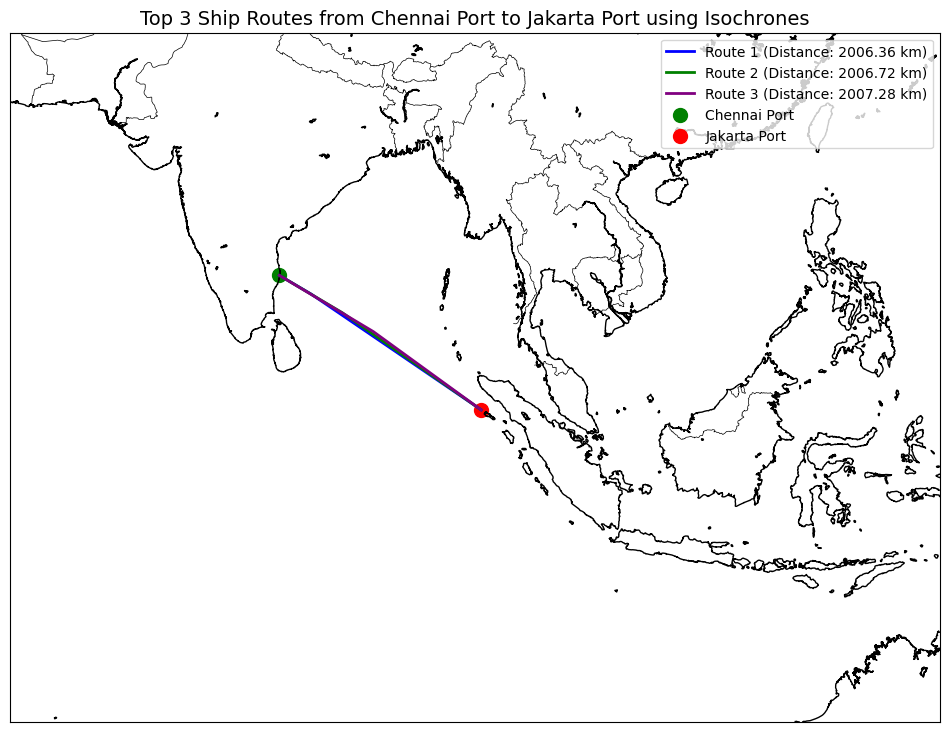

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from geopy.distance import geodesic
from geopy.point import Point
import math
from mpl_toolkits.basemap import Basemap

# Define the start and end ports with their coordinates
START_PORT = {
    'name': 'Chennai Port',
    'lat': 13.0827,
    'lon': 80.2707
}

END_PORT = {
    'name': 'Jakarta Port',
    'lat':3.071373, 
    'lon':95.469115
}

# Function to calculate the initial bearing between two points
def calculate_initial_compass_bearing(pointA, pointB):
    lat1 = math.radians(pointA.latitude)
    lat2 = math.radians(pointB.latitude)
    diffLong = math.radians(pointB.longitude - pointA.longitude)

    x = math.sin(diffLong) * math.cos(lat2)
    y = math.cos(lat1) * math.sin(lat2) - (math.sin(lat1) * math.cos(lat2) * math.cos(diffLong))

    initial_bearing = math.atan2(x, y)

    # Convert from radians to degrees
    initial_bearing = math.degrees(initial_bearing)
    compass_bearing = (initial_bearing + 360) % 360

    return compass_bearing

# Function to generate isochrones
def generate_isochrones(start, max_distance, num_isochrones=10):
    start_point = Point(start[0], start[1])
    isochrones = []
    
    for i in range(1, num_isochrones + 1):
        radius = (i * max_distance) / num_isochrones
        isochrone_points = []
        for bearing in range(0, 360, 10):  # Generate points in all directions
            point = geodesic(kilometers=radius).destination(start_point, bearing)
            isochrone_points.append((point.latitude, point.longitude))
        isochrones.append(isochrone_points)
    
    return isochrones

# Function to interpolate between isochrones and destination
def interpolate_via_isochrones(start, end, isochrones):
    start_point = Point(start[0], start[1])
    end_point = Point(end[0], end[1])
    routes = []

    for isochrone in isochrones:
        # Find the point on the isochrone closest to the destination
        closest_point = min(isochrone, key=lambda p: geodesic(p, end_point).kilometers)
        route = [start, closest_point, end]
        total_distance = (geodesic(start, closest_point).kilometers +
                          geodesic(closest_point, end).kilometers)
        routes.append((route, total_distance))
    
    # Sort routes by total distance and return the top 3
    routes.sort(key=lambda r: r[1])
    return routes[:3]

# Generate isochrones from the start point
isochrones = generate_isochrones((START_PORT['lat'], START_PORT['lon']), max_distance=3000, num_isochrones=10)

# Interpolate the route using isochrones
top_routes = interpolate_via_isochrones((START_PORT['lat'], START_PORT['lon']), (END_PORT['lat'], END_PORT['lon']), isochrones)

for i in top_routes:
    print(len(i[0]))
# Plotting the routes on a map with the Indian subcontinent in the background
plt.figure(figsize=(12, 10))
plt.title(f"Top 3 Ship Routes from {START_PORT['name']} to {END_PORT['name']} using Isochrones", fontsize=14)

# Set up Basemap centered around the Indian Ocean
m = Basemap(projection='merc', llcrnrlat=-20, urcrnrlat=30, llcrnrlon=60, urcrnrlon=130, resolution='i')

# Draw coastlines and country boundaries
m.drawcoastlines()
m.drawcountries()

# Plot each isochrone path and label it with its distance
colors = ['blue', 'green', 'purple']
for i, (route, distance) in enumerate(top_routes):
    route_lats = [point[0] for point in route]
    route_lons = [point[1] for point in route]
    
    x, y = m(route_lons, route_lats)
    m.plot(x, y, color=colors[i], linewidth=2, label=f'Route {i+1} (Distance: {distance:.2f} km)')

# Mark start and end points
x_start, y_start = m(START_PORT['lon'], START_PORT['lat'])
x_end, y_end = m(END_PORT['lon'], END_PORT['lat'])

m.scatter(x_start, y_start, color='green', s=100, label=START_PORT['name'])
m.scatter(x_end, y_end, color='red', s=100, label=END_PORT['name'])

plt.legend()
plt.show()


Time stage 1: subsector range = 4.0
Subsector 0:
  Min distance: 0.0, Max distance: 4.0
  Waypoints in subsector: []
Subsector 1:
  Min distance: 4.0, Max distance: 8.0
  Waypoints in subsector: []
Subsector 2:
  Min distance: 8.0, Max distance: 12.0
  Waypoints in subsector: []
Subsector 3:
  Min distance: 12.0, Max distance: 16.0
  Waypoints in subsector: []
No subsector waypoints found for time stage 1. Ending isochrone generation.


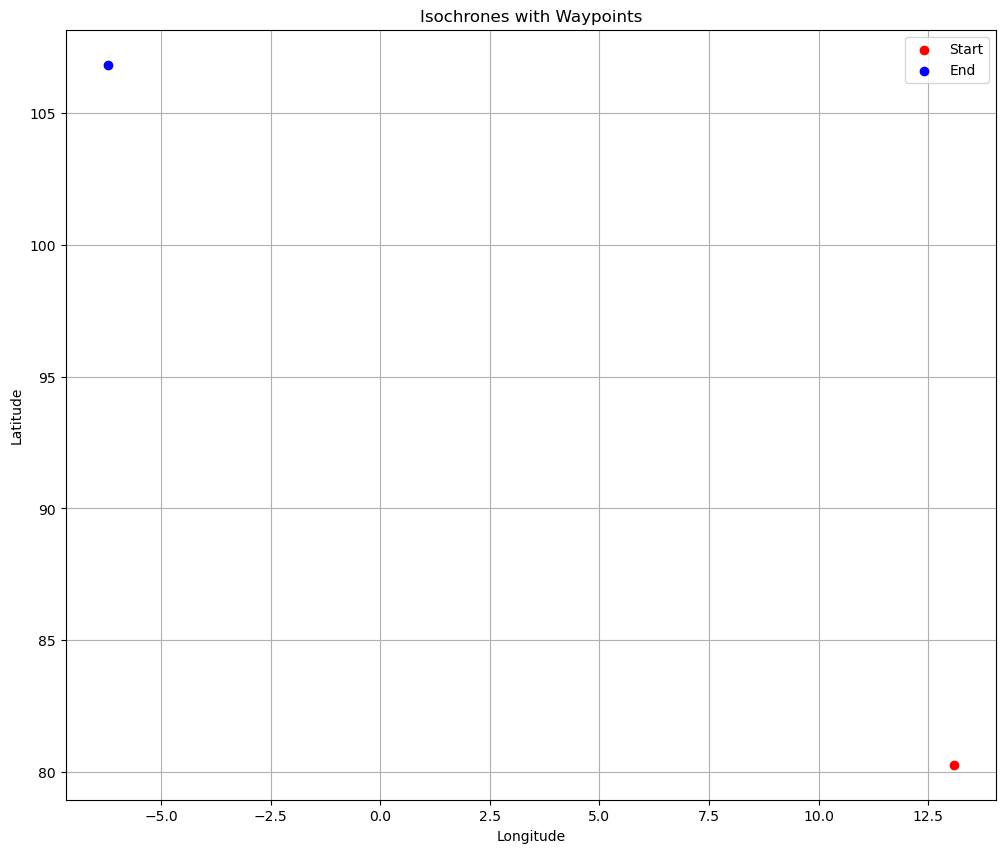

In [23]:
import numpy as np
import matplotlib.pyplot as plt
from geopy.distance import geodesic
from shapely.geometry import Point

# Parameters
DELTA_T = 1  # Time interval (hours)
DELTA_C = 10  # Course heading increment (degrees)
M = 4  # Number of successor waypoints per time stage
K = 4  # Number of subsectors
V = 20  # Ship speed (km/h)
STEP_SIZE = 10  # Distance increment for generating waypoints (km)

def calculate_initial_bearing(start, end):
    lat1, lon1 = np.radians(start)
    lat2, lon2 = np.radians(end)
    d_lon = lon2 - lon1
    x = np.sin(d_lon) * np.cos(lat2)
    y = np.cos(lat1) * np.sin(lat2) - np.sin(lat1) * np.cos(lat2) * np.cos(d_lon)
    initial_bearing = np.arctan2(x, y)
    initial_bearing = np.degrees(initial_bearing)
    return (initial_bearing + 360) % 360

def generate_waypoints(start, num_waypoints, heading, step_size):
    waypoints = []
    for i in range(-num_waypoints // 2, num_waypoints // 2 + 1):
        bearing = heading + i * DELTA_C
        waypoint = geodesic(kilometers=step_size).destination(start, bearing)
        waypoints.append((waypoint.latitude, waypoint.longitude))
    return waypoints

def is_feasible(point, constraints):
    # Placeholder for feasibility check
    return True

def generate_isochrones(start, end, V, num_isochrones=3, m=4, k=4, delta_t=1, step_size=10):
    start_point = Point(start[0], start[1])
    end_point = Point(end[0], end[1])
    
    isochrones = []
    current_waypoints = [start_point]
    
    for n in range(1, num_isochrones + 1):
        new_waypoints = []
        for waypoint in current_waypoints:
            start_coords = (start_point.y, start_point.x)  # (latitude, longitude)
            waypoint_coords = (waypoint.y, waypoint.x)
            heading = calculate_initial_bearing(start_coords, waypoint_coords)
            waypoints = generate_waypoints(waypoint_coords, 2 * m + 1, heading, step_size)
            waypoints = [Point(w) for w in waypoints if is_feasible(w, [])]
            new_waypoints.extend(waypoints)
        
        if not new_waypoints:
            print(f"No new waypoints generated for time stage {n}. Ending isochrone generation.")
            break
        
        dn = n * delta_t * V
        subsector_range = dn / (k + 1)  # Correct subsector range calculation
        
        print(f"Time stage {n}: subsector range = {subsector_range}")

        subsectors = []
        for i in range(k):
            sector_min = i * subsector_range
            sector_max = (i + 1) * subsector_range
            sector_waypoints = [w for w in new_waypoints if sector_min <= geodesic(start_coords, (w.y, w.x)).kilometers < sector_max]
            
            # Debugging prints
            print(f"Subsector {i}:")
            print(f"  Min distance: {sector_min}, Max distance: {sector_max}")
            print(f"  Waypoints in subsector: {sector_waypoints}")
            
            if sector_waypoints:
                optimal_waypoint = min(sector_waypoints, key=lambda w: geodesic((w.y, w.x), (end_point.y, end_point.x)).kilometers)
                subsectors.append(optimal_waypoint)
        
        if not subsectors:
            print(f"No subsector waypoints found for time stage {n}. Ending isochrone generation.")
            break
        
        isochrones.append(subsectors)
        current_waypoints = subsectors
        
        # Check if we are close enough to the destination
        if current_waypoints and geodesic((current_waypoints[0].y, current_waypoints[0].x), (end_point.y, end_point.x)).kilometers < delta_t * V:
            break
    
    return isochrones

def plot_isochrones(start, end, isochrones):
    plt.figure(figsize=(12, 10))
    plt.scatter(*start, color='red', label='Start')
    plt.scatter(*end, color='blue', label='End')
    
    for isochrone in isochrones:
        for point in isochrone:
            plt.scatter(point.x, point.y, color='green', marker='o')
            plt.plot([start[1], point.x], [start[0], point.y], color='grey', linestyle='--')

    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    plt.title('Isochrones with Waypoints')
    plt.legend()
    plt.grid(True)
    plt.show()

# Define start and end points
start = (13.0827, 80.2707)  # Chennai
end = (-6.2088, 106.8456)   # Jakarta

# Generate and plot isochrones
isochrones = generate_isochrones(start, end, V)
plot_isochrones(start, end, isochrones)


20
POINT (13.173090104859613 80.2707)
10.050921079258513
POINT (13.155821479648441 80.32491537726979)
10.028910981604547
POINT (13.110617242117039 80.35840630055431)
9.993201795758983
POINT (13.054752913615161 80.35838655627866)
9.993223416770915
POINT (13.009566730462701 80.3248834303119)
10.028967720747364
POINT (12.992309263491844 80.2707)
10.05099131537214
POINT (13.009566730462701 80.21651656968811)
10.028967720747364
POINT (13.054752913615161 80.18301344372135)
9.993223416770915
POINT (13.110617242117039 80.1829936994457)
9.993201795758983
POINT (13.155821479648441 80.21648462273022)
10.028910981604547
40
POINT (80.36025595468527 13.173090104859613)
8155.407302735196
POINT (80.34301026556308 13.486831001548484)
8149.259814799157
POINT (80.2980041640773 13.67840552064286)
8144.127435118335
POINT (80.24265749344902 13.675567214100251)
8141.971821163185
POINT (80.19810740476512 13.482238092278212)
8143.617257208083
POINT (80.18114357399952 13.173090104859613)
8148.434538933959
POINT

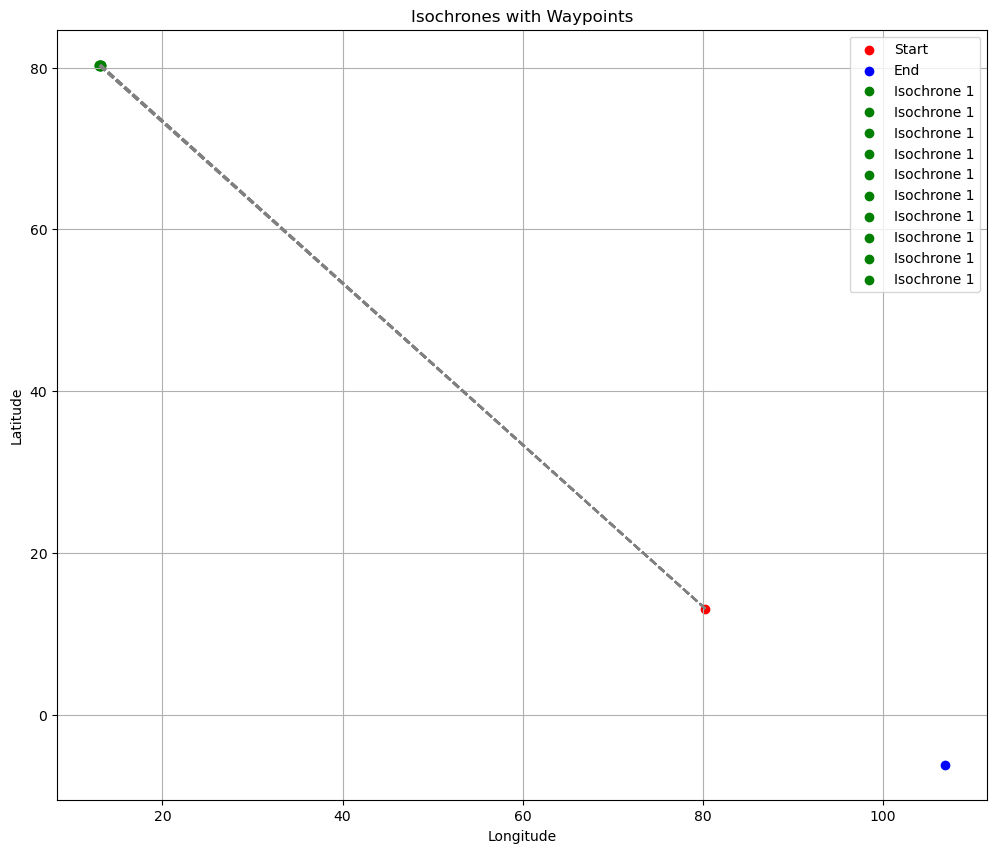

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from geopy.distance import geodesic
from shapely.geometry import Point

# Parameters
DELTA_T = 1  # Time interval (hours)
STEP_SIZE = 10  # Distance increment for generating waypoints (km)
NUM_WAYPOINTS = 10  # Number of waypoints per isochrone

def haversine(coord1, coord2):
    R = 6371  # Radius of Earth in kilometers
    lat1, lon1 = coord1
    lat2, lon2 = coord2
    dlat = math.radians(lat2 - lat1)
    dlon = math.radians(lon2 - lon1)
    a = math.sin(dlat / 2) ** 2 + math.cos(math.radians(lat1)) * math.cos(math.radians(lat2)) * math.sin(dlon / 2) ** 2
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1 - a))
    return R * c

def generate_circular_waypoints(start, num_waypoints, radius):
    waypoints = []
    for i in range(num_waypoints):
        angle = 2 * np.pi * i / num_waypoints
        destination = geodesic(kilometers=radius).destination(start, np.degrees(angle))
        waypoints.append((destination.latitude, destination.longitude))
    return waypoints

def calculate_distance(point1, point2):
    return geodesic(point1, point2).kilometers

def generate_isochrones(start, end, speed, num_isochrones=3, step_size=STEP_SIZE):
    start_point = Point(start[1], start[0])  # Note the order (lon, lat)
    end_point = Point(end[1], end[0])  # Note the order (lon, lat)
    
    isochrones = []
    current_waypoints = [start_point]
    
    for n in range(1, num_isochrones + 1):
        max_distance = n * speed * DELTA_T
        new_waypoints = []
        print(max_distance)
        for waypoint in current_waypoints:
            waypoints = generate_circular_waypoints((waypoint.y, waypoint.x), NUM_WAYPOINTS, step_size)
            waypoints = [Point(w) for w in waypoints]
            new_waypoints.extend(waypoints)
        
        subsectors = []
        
        for waypoint in new_waypoints:
            print(waypoint)
#             distance = calculate_distance((start_point.y, start_point.x), (waypoint.y, waypoint.x))
            distance = haversine((start_point.y,start_point.x ), (waypoint.x, waypoint.y))
            print(distance)
            if distance <= max_distance:
                subsectors.append(waypoint)
        
        if not subsectors:
            print(f"No new waypoints found for time stage {n}. Ending isochrone generation.")
            break
        
        isochrones.append(subsectors)
        current_waypoints = subsectors
        
        if calculate_distance((current_waypoints[0].y, current_waypoints[0].x), (end_point.y, end_point.x)) < speed * DELTA_T:
            break
    
    return isochrones

def plot_isochrones(start, end, isochrones):
    plt.figure(figsize=(12, 10))
    plt.scatter(start[1], start[0], color='red', label='Start')
    plt.scatter(end[1], end[0], color='blue', label='End')
    
    for i, isochrone in enumerate(isochrones):
        for point in isochrone:
            plt.scatter(point.x, point.y, color='green', marker='o', label=f'Isochrone {i + 1}')
            plt.plot([start[1], point.x], [start[0], point.y], color='grey', linestyle='--')

    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    plt.title('Isochrones with Waypoints')
    plt.legend()
    plt.grid(True)
    plt.show()

# Define start and end points
start = (13.0827, 80.2707)  # Chennai
end = (-6.2088, 106.8456)   # Jakarta

# Generate and plot isochrones
isochrones = generate_isochrones(start, end, speed=20)
plot_isochrones(start, end, isochrones)


Time stage 0:
  Subsector 0:
    Min distance: 0.0, Max distance: 3.75
    Waypoints in subsector: [(13.083, 80.271)]
  Subsector 1:
    Min distance: 3.75, Max distance: 7.5
    Waypoints in subsector: []
  Subsector 2:
    Min distance: 7.5, Max distance: 11.25
    Waypoints in subsector: []
  Subsector 3:
    Min distance: 11.25, Max distance: 15.0
    Waypoints in subsector: []
  Subsector 4:
    Min distance: 15.0, Max distance: 18.75
    Waypoints in subsector: []
  Subsector 5:
    Min distance: 18.75, Max distance: 22.5
    Waypoints in subsector: []
  Subsector 6:
    Min distance: 22.5, Max distance: 26.25
    Waypoints in subsector: []
  Subsector 7:
    Min distance: 26.25, Max distance: 30.0
    Waypoints in subsector: []
Time stage 1:
  Subsector 0:
    Min distance: 0.0, Max distance: 3.75
    Waypoints in subsector: [(13.083, 80.271)]
  Subsector 1:
    Min distance: 3.75, Max distance: 7.5
    Waypoints in subsector: []
  Subsector 2:
    Min distance: 7.5, Max distanc

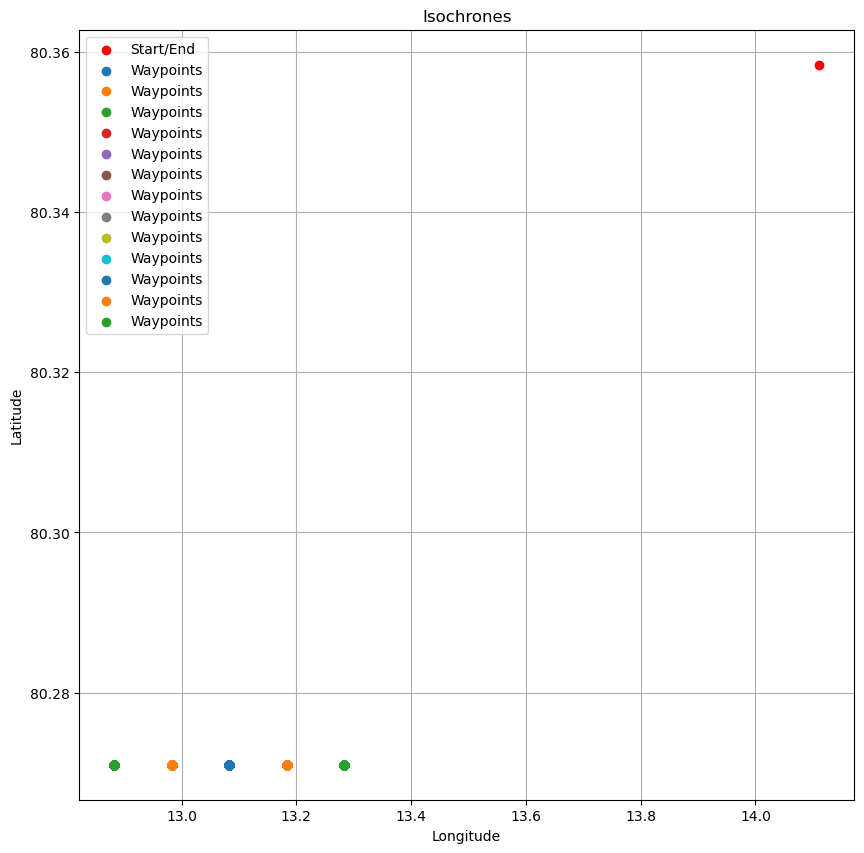

In [12]:
import math
import matplotlib.pyplot as plt

# Haversine formula for distance calculation
def haversine(coord1, coord2):
    R = 6371  # Radius of Earth in kilometers
    lat1, lon1 = coord1
    lat2, lon2 = coord2
    dlat = math.radians(lat2 - lat1)
    dlon = math.radians(lon2 - lon1)
    a = math.sin(dlat / 2) ** 2 + math.cos(math.radians(lat1)) * math.cos(math.radians(lat2)) * math.sin(dlon / 2) ** 2
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1 - a))
    return R * c

# Generate waypoints based on starting point, direction, and step size
def generate_waypoints(start, num_waypoints, heading, step_size):
    waypoints = []
    lat, lon = start
    for i in range(-num_waypoints//2, num_waypoints//2 + 1):
        new_lat = lat + step_size * i * math.cos(math.radians(heading))
        new_lon = lon + step_size * i * math.sin(math.radians(heading))
        waypoints.append((new_lat, new_lon))
    return waypoints

# Calculate heading between two points
def calculate_heading(start, end):
    lat1, lon1 = start
    lat2, lon2 = end
    dlon = lon2 - lon1
    y = math.sin(math.radians(dlon)) * math.cos(math.radians(lat2))
    x = math.cos(math.radians(lat1)) * math.sin(math.radians(lat2)) - math.sin(math.radians(lat1)) * math.cos(math.radians(lat2)) * math.cos(math.radians(dlon))
    return math.degrees(math.atan2(y, x))

# Generate isochrones
def generate_isochrones(start, end, V, num_isochrones=5, m=4, k=4, delta_t=1, step_size=0.1):
    isochrones = []
    current_waypoints = [start]
    
    for n in range(num_isochrones):
        print(f"Time stage {n}:")
        subsectors = []
        for s in range(2 * k):
            min_distance = s * (delta_t * V / k)
            max_distance = (s + 1) * (delta_t * V / k)
            waypoints_in_subsector = [
                wp for wp in current_waypoints
                if min_distance <= haversine(start, wp) < max_distance
            ]
            print(f"  Subsector {s}:")
            print(f"    Min distance: {min_distance}, Max distance: {max_distance}")
            print(f"    Waypoints in subsector: {waypoints_in_subsector}")
            if waypoints_in_subsector:
                subsectors.append(waypoints_in_subsector)
        
        if not subsectors:
            print("No subsector waypoints found. Ending isochrone generation.")
            break

        current_waypoints = []
        for subsector in subsectors:
            for waypoint in subsector:
                heading = calculate_heading(start, waypoint)
                new_waypoints = generate_waypoints(waypoint, 2 * m + 1, heading, step_size)
                current_waypoints.extend(new_waypoints)
        
        isochrones.append(subsectors)
    
    return isochrones

# Plot isochrones
def plot_isochrones(start, end, isochrones):
    plt.figure(figsize=(10, 10))
    plt.scatter(*zip(*[start, end]), c='red', marker='o', label='Start/End')
    
    for isochrone in isochrones:
        for subsector in isochrone:
            plt.scatter(*zip(*subsector), label='Waypoints')

    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    plt.title('Isochrones')
    plt.legend()
    plt.grid(True)
    plt.show()

# Example usage
if __name__ == "__main__":
    start = (13.083, 80.271)  # Example start point (Chennai)
    end = (14.1106, 80.3584)  # Example end point
    V = 15  # Ship speed in km/h

    isochrones = generate_isochrones(start, end, V)
    plot_isochrones(start, end, isochrones)


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import math
from geopy.distance import geodesic

# Parameters
DELTA_T = 1  # Time interval (hours)
STEP_SIZE = 10  # Distance increment for generating waypoints (km)
NUM_WAYPOINTS = 10  # Number of waypoints per isochrone

def haversine(coord1, coord2):
    R = 6371  # Radius of Earth in kilometers
    lat1, lon1 = coord1
    lat2, lon2 = coord2
    dlat = math.radians(lat2 - lat1)
    dlon = math.radians(lon2 - lon1)
    a = math.sin(dlat / 2) ** 2 + math.cos(math.radians(lat1)) * math.cos(math.radians(lat2)) * math.sin(dlon / 2) ** 2
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1 - a))
    return R * c

def generate_circular_waypoints(start, num_waypoints, radius):
    waypoints = []
    for i in range(num_waypoints):
        angle = 360 * i / num_waypoints
        destination = geodesic(kilometers=radius).destination(start, angle)
        waypoints.append((destination.latitude, destination.longitude))
    return waypoints

def generate_isochrones(start, end, speed, num_isochrones=100, step_size=STEP_SIZE):
    start_point = start
    end_point = end
    
    isochrones = []
    current_waypoints = [start_point]
    
    for n in range(1, num_isochrones + 1):
        print(n)
        max_distance = n * speed * DELTA_T
        new_waypoints = []
        print(f"Max distance for stage {n}: {max_distance} km")
        for waypoint in current_waypoints:
            waypoints = generate_circular_waypoints(waypoint, NUM_WAYPOINTS, step_size)
            new_waypoints.extend(waypoints)
        
        subsectors = []
        
        for waypoint in new_waypoints:
#             print(f"Waypoint: {waypoint}")
            distance = haversine(start_point, waypoint)
#             print(f"Distance from start: {distance} km")
            if distance <= max_distance:
                subsectors.append(waypoint)
        
        if not subsectors:
            print(f"No new waypoints found for time stage {n}. Ending isochrone generation.")
            break
        
        isochrones.append(subsectors)
        current_waypoints = subsectors
        
        if haversine(current_waypoints[0], end_point) < speed * DELTA_T:
            break
    
    return isochrones

def plot_isochrones(start, end, isochrones):
    plt.figure(figsize=(12, 10))
    plt.scatter(start[1], start[0], color='red', label='Start')
    plt.scatter(end[1], end[0], color='blue', label='End')
    
    for i, isochrone in enumerate(isochrones):
        for point in isochrone:
            plt.scatter(point[1], point[0], color='green', marker='o', label=f'Isochrone {i + 1}')
            plt.plot([start[1], point[1]], [start[0], point[0]], color='grey', linestyle='--')

    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    plt.title('Isochrones with Waypoints')
    plt.legend()
    plt.grid(True)
    plt.show()

# Define start and end points
start = (13.0827, 80.2707)  # Chennai
end = (-6.2088, 106.8456)   # Jakarta

# Generate and plot isochrones
isochrones = generate_isochrones(start, end, speed=20)
plot_isochrones(start, end, isochrones)


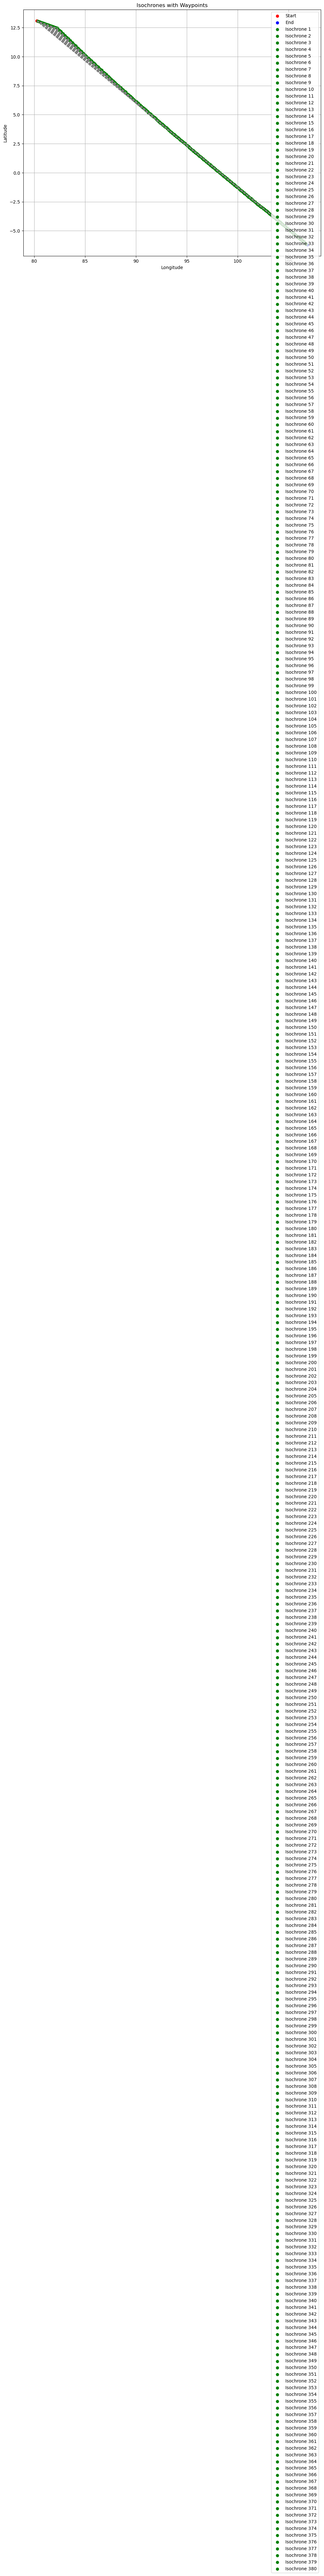

In [36]:
import numpy as np
import matplotlib.pyplot as plt
import math

# Parameters
DELTA_T = 1  # Time interval (hours)
STEP_SIZE = 10  # Distance increment for generating waypoints (km)
NUM_WAYPOINTS = 10  # Number of waypoints per isochrone
WAYPOINTS_PER_SUBSECTOR = 1  # Number of closest waypoints to keep

def haversine(coord1, coord2):
    R = 6371  # Radius of Earth in kilometers
    lat1, lon1 = coord1
    lat2, lon2 = coord2
    dlat = math.radians(lat2 - lat1)
    dlon = math.radians(lon2 - lon1)
    a = math.sin(dlat / 2) ** 2 + math.cos(math.radians(lat1)) * math.cos(math.radians(lat2)) * math.sin(dlon / 2) ** 2
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1 - a))
    return R * c

def generate_circular_waypoints(start, num_waypoints, radius):
    waypoints = []
    for i in range(num_waypoints):
        angle = 360.0 * i / num_waypoints
        dlat = radius * np.cos(np.radians(angle)) / 111  # Approximation: 1 degree latitude ≈ 111 km
        dlon = radius * np.sin(np.radians(angle)) / (111 * np.cos(np.radians(start[0])))
        waypoints.append((start[0] + dlat, start[1] + dlon))
    return waypoints

def generate_isochrones(start, end, speed, num_isochrones=3, step_size=STEP_SIZE):
    isochrones = []
    current_waypoints = [start]
    
    for n in range(1, num_isochrones + 1):
        max_distance = n * speed * DELTA_T
        new_waypoints = []
        
        for waypoint in current_waypoints:
            waypoints = generate_circular_waypoints(waypoint, NUM_WAYPOINTS, step_size)
            distances = [(wp, haversine(wp, end)) for wp in waypoints]
            distances.sort(key=lambda x: x[1])
            new_waypoints.extend([wp for wp, dist in distances[:WAYPOINTS_PER_SUBSECTOR]])
        
        if not new_waypoints:
            print(f"No new waypoints found for time stage {n}. Ending isochrone generation.")
            break
        
        isochrones.append(new_waypoints)
        current_waypoints = new_waypoints
        
        if haversine(current_waypoints[0], end) < speed * DELTA_T:
            break
    
    return isochrones

def plot_isochrones(start, end, isochrones):
    plt.figure(figsize=(12, 10))
    plt.scatter(start[1], start[0], color='red', label='Start')
    plt.scatter(end[1], end[0], color='blue', label='End')
    
    for i, isochrone in enumerate(isochrones):
        for point in isochrone:
            plt.scatter(point[1], point[0], color='green', marker='o', label=f'Isochrone {i + 1}')
            plt.plot([start[1], point[1]], [start[0], point[0]], color='grey', linestyle='--')

    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    plt.title('Isochrones with Waypoints')
    plt.legend()
    plt.grid(True)
    plt.show()

# Define start and end points
start = (13.0827, 80.2707)  # Chennai
end = (-6.2088, 106.8456)   # Jakarta

# Generate and plot isochrones

num_isochrones = math.ceil(haversine(start, end) / 20)

isochrones = generate_isochrones(start, end, speed=20, num_isochrones=1000)
plot_isochrones(start, end, isochrones)


[(13.054860631137393, 80.35866392740552)]
[(13.027021262274785, 80.44661793385082)]
[(12.999181893412176, 80.53456204233372)]
[(12.971342524549568, 80.62249627583957)]
[(12.94350315568696, 80.71042065734132)]
[(12.915663786824352, 80.79833520979956)]
[(12.887824417961744, 80.88623995616253)]
[(12.859985049099135, 80.97413491936616)]
[(12.832145680236527, 81.06202012233413)]
[(12.804306311373919, 81.14989558797784)]
[(12.77646694251131, 81.2377613391965)]
[(12.748627573648703, 81.32561739887711)]
[(12.720788204786095, 81.41346378989459)]
[(12.692948835923486, 81.50130053511168)]
[(12.665109467060878, 81.58912765737905)]
[(12.63727009819827, 81.67694517953534)]
[(12.609430729335662, 81.76475312440714)]
[(12.581591360473054, 81.85255151480906)]
[(12.553751991610445, 81.94034037354378)]
[(12.525912622747837, 82.02811972340201)]
[(12.498073253885229, 82.11588958716261)]
[(12.47023388502262, 82.20364998759254)]
[(12.442394516160013, 82.29140094744695)]
[(12.36951010225236, 82.34562820264202)

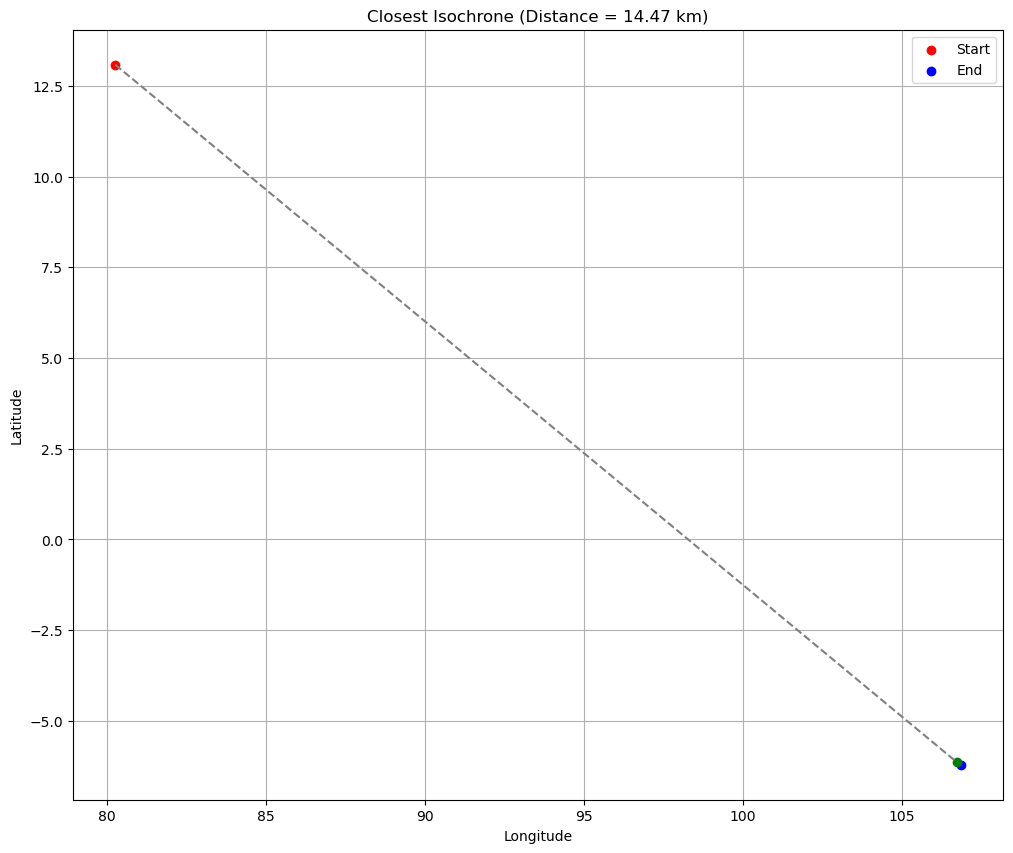

In [46]:
import numpy as np
import matplotlib.pyplot as plt
import math

# Parameters
DELTA_T = 1  # Time interval (hours)
STEP_SIZE = 10  # Distance increment for generating waypoints (km)
NUM_WAYPOINTS = 10  # Number of waypoints per isochrone
WAYPOINTS_PER_SUBSECTOR = 1  # Number of closest waypoints to keep

def haversine(coord1, coord2):
    R = 6371  # Radius of Earth in kilometers
    lat1, lon1 = coord1
    lat2, lon2 = coord2
    dlat = math.radians(lat2 - lat1)
    dlon = math.radians(lon2 - lon1)
    a = math.sin(dlat / 2) ** 2 + math.cos(math.radians(lat1)) * math.cos(math.radians(lat2)) * math.sin(dlon / 2) ** 2
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1 - a))
    return R * c

def generate_circular_waypoints(start, num_waypoints, radius):
    waypoints = []
    for i in range(num_waypoints):
        angle = 360.0 * i / num_waypoints
        dlat = radius * np.cos(np.radians(angle)) / 111  # Approximation: 1 degree latitude ≈ 111 km
        dlon = radius * np.sin(np.radians(angle)) / (111 * np.cos(np.radians(start[0])))
        waypoints.append((start[0] + dlat, start[1] + dlon))
    return waypoints

def generate_isochrones(start, end, speed, num_isochrones=3, step_size=STEP_SIZE):
    isochrones = []
    current_waypoints = [start]
    
    for n in range(1, num_isochrones + 1):
        max_distance = n * speed * DELTA_T
        new_waypoints = []
        
        for waypoint in current_waypoints:
            waypoints = generate_circular_waypoints(waypoint, NUM_WAYPOINTS, step_size)
            distances = [(wp, haversine(wp, end)) for wp in waypoints]
            distances.sort(key=lambda x: x[1])
            
            new_waypoints.extend([wp for wp, dist in distances[:WAYPOINTS_PER_SUBSECTOR]])
            print(new_waypoints)
        
        if not new_waypoints:
            print(f"No new waypoints found for time stage {n}. Ending isochrone generation.")
            break
        
        isochrones.append(new_waypoints)
        
        current_waypoints = new_waypoints
        
        if haversine(current_waypoints[0], end) < speed * DELTA_T:
            break
    
    return isochrones

def plot_min_distance_isochrone(start, end, isochrones):
    # Find the isochrone with the minimum distance to the end point
    min_distance = float('inf')
    closest_isochrone = None
    print("uphere")
    for isochrone in isochrones:
        for point in isochrone:
            distance = haversine(point, end)
            if distance < min_distance:
                min_distance = distance
                closest_isochrone = isochrone
    
    # Plot the closest isochrone
    if closest_isochrone:
        plt.figure(figsize=(12, 10))
        plt.scatter(start[1], start[0], color='red', label='Start')
        plt.scatter(end[1], end[0], color='blue', label='End')
        
        for point in closest_isochrone:
            plt.scatter(point[1], point[0], color='green', marker='o')
            plt.plot([start[1], point[1]], [start[0], point[0]], color='grey', linestyle='--')
        
        plt.xlabel('Longitude')
        plt.ylabel('Latitude')
        plt.title(f'Closest Isochrone (Distance = {min_distance:.2f} km)')
        plt.legend()
        plt.grid(True)
        plt.show()

# Define start and end points
start = (13.0827, 80.2707)  # Chennai
end = (-6.2088, 106.8456)   # Jakarta

# Generate isochrones
isochrones = generate_isochrones(start, end, speed=20, num_isochrones=1000)

# Plot the closest isochrone
plot_min_distance_isochrone(start, end, isochrones)


In [47]:
import numpy as np
import matplotlib.pyplot as plt
import math

# Parameters
DELTA_T = 1  # Time interval (hours)
STEP_SIZE = 10  # Distance increment for generating waypoints (km)
NUM_WAYPOINTS = 10  # Number of waypoints per isochrone
WAYPOINTS_PER_SUBSECTOR = 1  # Number of closest waypoints to keep
NUM_SUBSECTORS = 5  # Number of subsectors to divide the circular region into

def haversine(coord1, coord2):
    R = 6371  # Radius of Earth in kilometers
    lat1, lon1 = coord1
    lat2, lon2 = coord2
    dlat = math.radians(lat2 - lat1)
    dlon = math.radians(lon2 - lon1)
    a = math.sin(dlat / 2) ** 2 + math.cos(math.radians(lat1)) * math.cos(math.radians(lat2)) * math.sin(dlon / 2) ** 2
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1 - a))
    return R * c

def generate_circular_waypoints(start, num_waypoints, radius):
    waypoints = []
    for i in range(num_waypoints):
        angle = 360.0 * i / num_waypoints
        dlat = radius * np.cos(np.radians(angle)) / 111  # Approximation: 1 degree latitude ≈ 111 km
        dlon = radius * np.sin(np.radians(angle)) / (111 * np.cos(np.radians(start[0])))
        waypoints.append((start[0] + dlat, start[1] + dlon))
    return waypoints

def generate_isochrones(start, end, speed, num_isochrones=3, step_size=STEP_SIZE):
    isochrones = []
    current_waypoints = [start]
    
    for n in range(1, num_isochrones + 1):
        max_distance = n * speed * DELTA_T
        new_waypoints = []
        
        for waypoint in current_waypoints:
            waypoints = generate_circular_waypoints(waypoint, NUM_WAYPOINTS, step_size)
            subsector_size = 360.0 / NUM_SUBSECTORS
            subsectors = {i: [] for i in range(NUM_SUBSECTORS)}
            
            for wp in waypoints:
                angle = np.degrees(np.arctan2(wp[1] - waypoint[1], wp[0] - waypoint[0]))
                if angle < 0:
                    angle += 360
                subsector = int(angle // subsector_size)
                subsectors[subsector].append((wp, haversine(wp, end)))
            
            for sector in subsectors:
                subsectors[sector].sort(key=lambda x: x[1])
                new_waypoints.extend([wp for wp, dist in subsectors[sector][:WAYPOINTS_PER_SUBSECTOR]])
        
        if not new_waypoints:
            print(f"No new waypoints found for time stage {n}. Ending isochrone generation.")
            break
        
        isochrones.append(new_waypoints)
        current_waypoints = new_waypoints
        
        if haversine(current_waypoints[0], end) < speed * DELTA_T:
            break
    
    return isochrones

def plot_best_paths(start, end, isochrones, num_paths=3):
    paths = []
    
    for isochrone in isochrones:
        for point in isochrone:
            distance = haversine(point, end)
            paths.append((point, distance))
    
    paths.sort(key=lambda x: x[1])
    best_paths = paths[:num_paths]
    
    plt.figure(figsize=(12, 10))
    plt.scatter(start[1], start[0], color='red', label='Start')
    plt.scatter(end[1], end[0], color='blue', label='End')
    
    for i, (point, distance) in enumerate(best_paths):
        plt.scatter(point[1], point[0], color='green', marker='o', label=f'Path {i+1} (Distance = {distance:.2f} km)')
        plt.plot([start[1], point[1]], [start[0], point[0]], color='grey', linestyle='--')
    
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    plt.title(f'Top {num_paths} Best Paths')
    plt.legend()
    plt.grid(True)
    plt.show()

# Define start and end points
start = (13.0827, 80.2707)  # Chennai
end = (-6.2088, 106.8456)   # Jakarta

# Generate isochrones
isochrones = generate_isochrones(start, end, speed=20, num_isochrones=1000)

# Plot the best 3 paths
plot_best_paths(start, end, isochrones, num_paths=3)


KeyboardInterrupt: 

1


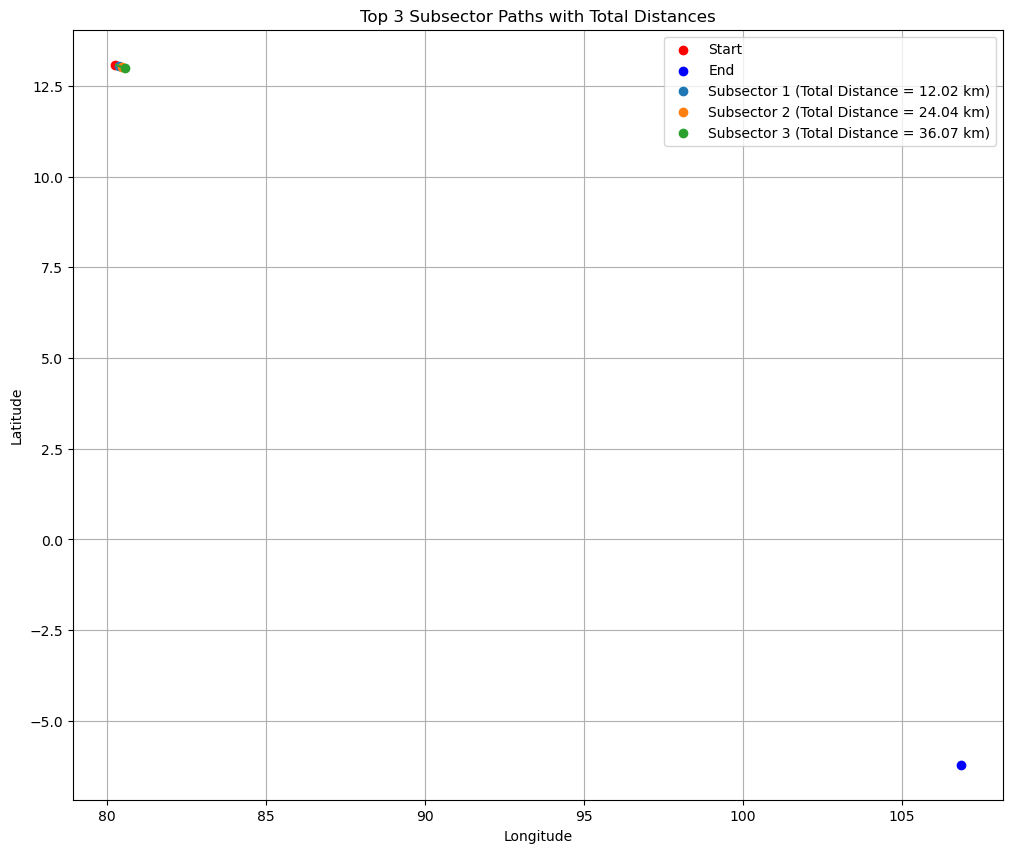

In [51]:
import numpy as np
import matplotlib.pyplot as plt
import math

# Parameters
DELTA_T = 1  # Time interval (hours)
STEP_SIZE = 10  # Distance increment for generating waypoints (km)
NUM_WAYPOINTS = 10  # Number of waypoints per isochrone
WAYPOINTS_PER_SUBSECTOR = 1  # Number of closest waypoints to keep
SUBSECTOR_MULTIPLIER = 0.1  # Multiplier to define subsectors

def haversine(coord1, coord2):
    R = 6371  # Radius of Earth in kilometers
    lat1, lon1 = coord1
    lat2, lon2 = coord2
    dlat = math.radians(lat2 - lat1)
    dlon = math.radians(lon2 - lon1)
    a = math.sin(dlat / 2) ** 2 + math.cos(math.radians(lat1)) * math.cos(math.radians(lat2)) * math.sin(dlon / 2) ** 2
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1 - a))
    return R * c

def generate_circular_waypoints(start, num_waypoints, radius):
    waypoints = []
    for i in range(num_waypoints):
        angle = 360.0 * i / num_waypoints
        dlat = radius * np.cos(np.radians(angle)) / 111  # Approximation: 1 degree latitude ≈ 111 km
        dlon = radius * np.sin(np.radians(angle)) / (111 * np.cos(np.radians(start[0])))
        waypoints.append((start[0] + dlat, start[1] + dlon))
    return waypoints

def generate_isochrones_with_subsectors(start, end, speed, num_isochrones=3, step_size=STEP_SIZE):
    subsector_paths = []
    current_waypoints = [start]
    total_distances = {tuple(start): 0.0}  # Track total distances traveled

    for n in range(1, num_isochrones + 1):
        max_distance = n * speed * DELTA_T
        new_waypoints = []

        for waypoint in current_waypoints:
            subsector_waypoints = []
            for i in range(-2, 3):  # Generate 5 subsectors (left, center, right)
                adjusted_step = step_size + (i * SUBSECTOR_MULTIPLIER * step_size)
                waypoints = generate_circular_waypoints(waypoint, NUM_WAYPOINTS, adjusted_step)
                subsector_waypoints.extend(waypoints)

            # Find the closest waypoint to the end point for each subsector
            distances = [(wp, haversine(wp, end)) for wp in subsector_waypoints]
            distances.sort(key=lambda x: x[1])

            for wp, _ in distances[:WAYPOINTS_PER_SUBSECTOR]:
                new_waypoints.append(wp)
                total_distances[tuple(wp)] = total_distances[tuple(waypoint)] + haversine(waypoint, wp)

        if not new_waypoints:
            print(f"No new waypoints found for time stage {n}. Ending isochrone generation.")
            break

        subsector_paths.append(new_waypoints)
        current_waypoints = new_waypoints

        if haversine(current_waypoints[0], end) < speed * DELTA_T:
            break

    return subsector_paths, total_distances

def plot_top_3_isochrones(start, end, isochrones, total_distances):
    # Find the top 3 isochrones with the minimum total distance traveled
    subsector_distances = []
    for isochrone in isochrones:
        for point in isochrone:
            subsector_distances.append((isochrone, total_distances[tuple(point)]))

    subsector_distances.sort(key=lambda x: x[1])
    top_isochrones = subsector_distances[:3]
    print(len(top_isochrones[0][0]))
    # Plot the top 3 isochrones
    plt.figure(figsize=(12, 10))
    plt.scatter(start[1], start[0], color='red', label='Start')
    plt.scatter(end[1], end[0], color='blue', label='End')

    for i, (isochrone, dist) in enumerate(top_isochrones):
        for point in isochrone:
            plt.scatter(point[1], point[0], label=f'Subsector {i + 1} (Total Distance = {dist:.2f} km)')
            plt.plot([start[1], point[1]], [start[0], point[0]], linestyle='--')

    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    plt.title('Top 3 Subsector Paths with Total Distances')
    plt.legend()
    plt.grid(True)
    plt.show()

# Define start and end points
start = (13.0827, 80.2707)  # Chennai
end = (-6.2088, 106.8456)   # Jakarta

# Generate isochrones and total distances
isochrones, total_distances = generate_isochrones_with_subsectors(start, end, speed=20, num_isochrones=1000)

# Plot the top 3 closest isochrones
plot_top_3_isochrones(start, end, isochrones, total_distances)


3635.657557601108


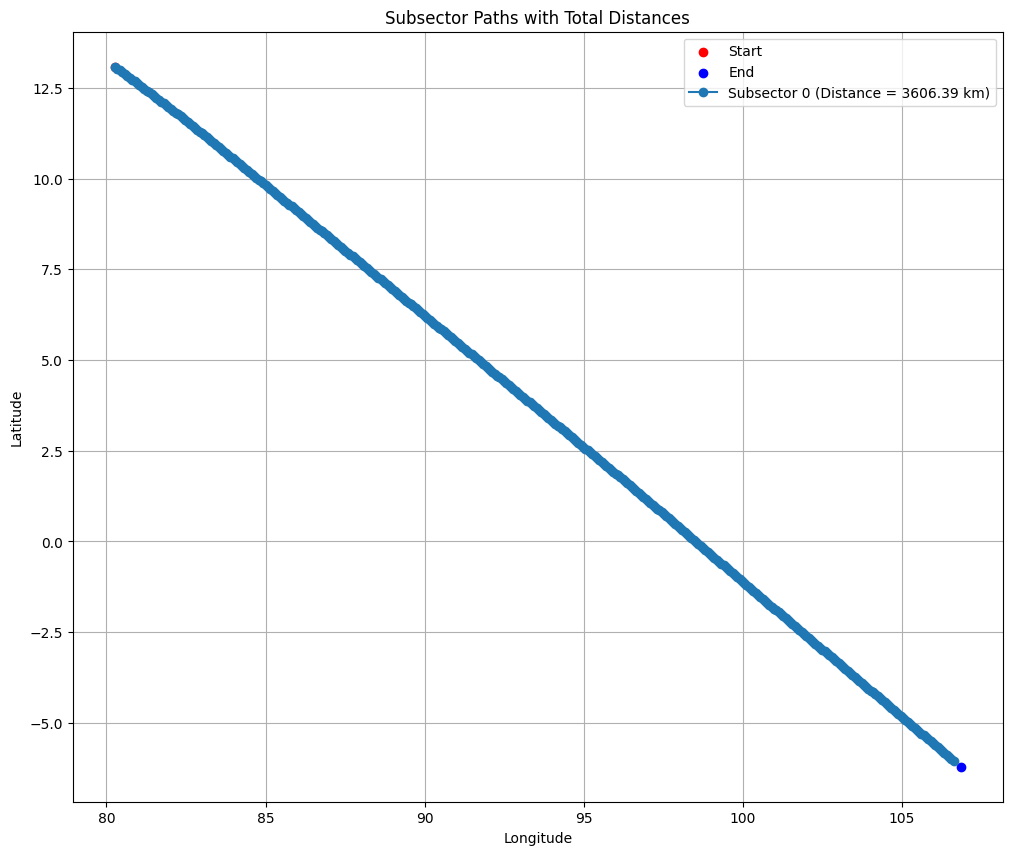

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import math

# Parameters
DELTA_T = 1  # Time interval (hours)
STEP_SIZE = 10  # Distance increment for generating waypoints (km)
NUM_WAYPOINTS = 200 # Number of waypoints per isochrone
WAYPOINTS_PER_SUBSECTOR = 1  # Number of closest waypoints to keep
SUBSECTOR_COUNT = 0  # Number of subsectors on each side of the reference path
SUBSECTOR_DISTANCE = 100  # Distance between subsectors (km)

def haversine(coord1, coord2):
    R = 6371  # Radius of Earth in kilometers
    lat1, lon1 = coord1
    lat2, lon2 = coord2
    dlat = math.radians(lat2 - lat1)
    dlon = math.radians(coord2[1] - coord1[1])
    a = math.sin(dlat / 2) ** 2 + math.cos(math.radians(lat1)) * math.cos(math.radians(lat2)) * math.sin(dlon / 2) ** 2
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1 - a))
    return R * c

def generate_circular_waypoints(start, num_waypoints, radius):
    waypoints = []
    for i in range(num_waypoints):
        angle = 360.0 * i / num_waypoints
        dlat = radius * np.cos(np.radians(angle)) / 111  # Approximation: 1 degree latitude ≈ 111 km
        dlon = radius * np.sin(np.radians(angle)) / (111 * np.cos(np.radians(start[0])))
        waypoints.append((start[0] + dlat, start[1] + dlon))
    return waypoints

def generate_subsector_points(start, end, subsector_count, subsector_distance):
    subsector_points = []
    great_circle_bearing = np.arctan2(end[1] - start[1], end[0] - start[0])

    for i in range(-subsector_count, subsector_count + 1):
        bearing_offset = i * (subsector_distance / haversine(start, end))
        new_bearing = great_circle_bearing + bearing_offset
        dx = subsector_distance * np.cos(new_bearing) / 111
        dy = subsector_distance * np.sin(new_bearing) / (111 * np.cos(np.radians(start[0])))
        new_point = (start[0] + dx, start[1] + dy)
        subsector_points.append(new_point)
    return subsector_points

def generate_isochrones_for_subsectors(start, end, speed, num_isochrones=3, step_size=STEP_SIZE):
    subsector_paths = {i: [start] for i in range(-SUBSECTOR_COUNT, SUBSECTOR_COUNT + 1)}
    total_distances = {i: 0.0 for i in range(-SUBSECTOR_COUNT, SUBSECTOR_COUNT + 1)}

    for n in range(1, num_isochrones + 1):
        max_distance = n * speed * DELTA_T

        for subsector_idx, subsector_waypoints in subsector_paths.items():
            last_waypoint = subsector_waypoints[-1]
            new_waypoints = generate_circular_waypoints(last_waypoint, NUM_WAYPOINTS, step_size)
            
            distances = [(wp, haversine(wp, end)) for wp in new_waypoints]
            distances.sort(key=lambda x: x[1])
            
            if distances:
                best_waypoint, dist_to_end = distances[0]
                subsector_paths[subsector_idx].append(best_waypoint)
                total_distances[subsector_idx] += haversine(last_waypoint, best_waypoint)
            
            # Check if the closest waypoint is close enough to end the search for this subsector
            if haversine(subsector_paths[subsector_idx][-1], end) < speed * DELTA_T:
                break

    return subsector_paths, total_distances

def plot_subsector_paths(start, end, subsector_paths, total_distances):
    plt.figure(figsize=(12, 10))
    plt.scatter(start[1], start[0], color='red', label='Start')
    plt.scatter(end[1], end[0], color='blue', label='End')

    for subsector_idx, path in subsector_paths.items():
        lons = [p[1] for p in path]
        lats = [p[0] for p in path]
        plt.plot(lons, lats, marker='o', label=f'Subsector {subsector_idx} (Distance = {total_distances[subsector_idx]:.2f} km)')

    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    plt.title('Subsector Paths with Total Distances')
    plt.legend()
    plt.grid(True)
    plt.show()

# Define start and end points
start = (13.0827, 80.2707)  # Chennai
end = (-6.2088, 106.8456)   # Jakarta
print(haversine(start, end))
# Generate subsector points based on the great circle path
subsector_points = generate_subsector_points(start, end, SUBSECTOR_COUNT, SUBSECTOR_DISTANCE)

# Generate isochrones and total distances for each subsector
subsector_paths, total_distances = generate_isochrones_for_subsectors(start, end, speed=20, num_isochrones=360)

# Plot the subsector paths and show the total distances traveled by each
plot_subsector_paths(start, end, subsector_paths, total_distances)


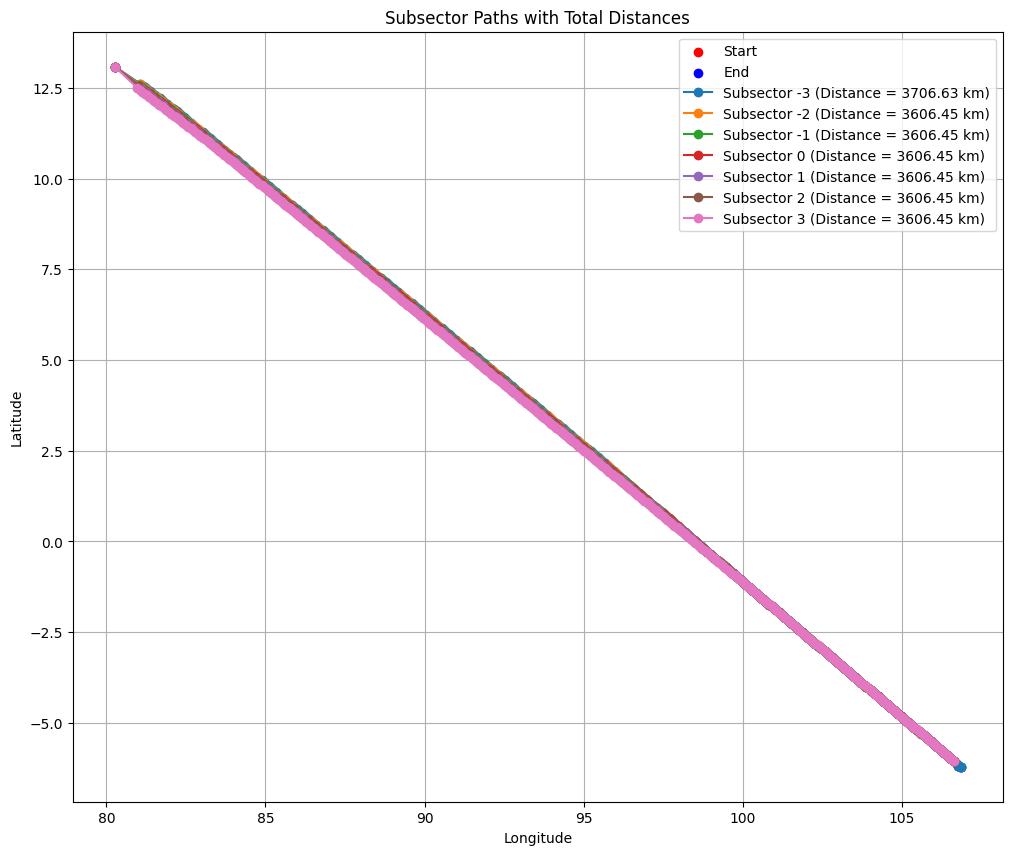

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import math

# Parameters
DELTA_T = 1  # Time interval (hours)
STEP_SIZE = 10  # Distance increment for generating waypoints (km)
NUM_WAYPOINTS = 200  # Number of waypoints per isochrone
WAYPOINTS_PER_SUBSECTOR = 1  # Number of closest waypoints to keep
SUBSECTOR_COUNT = 3  # Number of subsectors on each side of the reference path
SUBSECTOR_DISTANCE = 100  # Distance between subsectors (km)

def haversine(coord1, coord2):
    R = 6371  # Radius of Earth in kilometers
    lat1, lon1 = coord1
    lat2, lon2 = coord2
    dlat = math.radians(lat2 - lat1)
    dlon = math.radians(lon2 - lon1)
    a = math.sin(dlat / 2) ** 2 + math.cos(math.radians(lat1)) * math.cos(math.radians(lat2)) * math.sin(dlon / 2) ** 2
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1 - a))
    return R * c

def generate_circular_waypoints(start, num_waypoints, radius):
    waypoints = []
    for i in range(num_waypoints):
        angle = 360.0 * i / num_waypoints
        dlat = radius * np.cos(np.radians(angle)) / 111  # Approximation: 1 degree latitude ≈ 111 km
        dlon = radius * np.sin(np.radians(angle)) / (111 * np.cos(np.radians(start[0])))
        waypoints.append((start[0] + dlat, start[1] + dlon))
    return waypoints

def generate_subsector_points(start, end, subsector_count, subsector_distance):
    subsector_points = []
    great_circle_bearing = np.arctan2(end[1] - start[1], end[0] - start[0])

    for i in range(-subsector_count, subsector_count + 1):
        bearing_offset = i * (subsector_distance / haversine(start, end))
        new_bearing = great_circle_bearing + bearing_offset
        dx = subsector_distance * np.cos(new_bearing) / 111
        dy = subsector_distance * np.sin(new_bearing) / (111 * np.cos(np.radians(start[0])))
        new_point = (start[0] + dx, start[1] + dy)
        subsector_points.append(new_point)
    return subsector_points

def generate_isochrones_for_subsectors(start, end, speed, num_isochrones=3, step_size=STEP_SIZE):
    subsector_points = generate_subsector_points(start, end, SUBSECTOR_COUNT, SUBSECTOR_DISTANCE)
    subsector_paths = {i: [start] for i in range(-SUBSECTOR_COUNT, SUBSECTOR_COUNT + 1)}
    total_distances = {i: 0.0 for i in range(-SUBSECTOR_COUNT, SUBSECTOR_COUNT + 1)}

    for i, point in enumerate(subsector_points):
        subsector_key = i - SUBSECTOR_COUNT  # Adjust index to match subsector_paths keys
        initial_distance = haversine(start, point)
        subsector_paths[subsector_key].append(point)
        total_distances[subsector_key] += initial_distance

    for n in range(1, num_isochrones + 1):
        max_distance = n * speed * DELTA_T

        for subsector_idx, subsector_waypoints in subsector_paths.items():
            last_waypoint = subsector_waypoints[-1]
            new_waypoints = generate_circular_waypoints(last_waypoint, NUM_WAYPOINTS, step_size)
            
            distances = [(wp, haversine(wp, end)) for wp in new_waypoints]
            distances.sort(key=lambda x: x[1])
            
            if distances:
                best_waypoint, dist_to_end = distances[0]
                subsector_paths[subsector_idx].append(best_waypoint)
                total_distances[subsector_idx] += haversine(last_waypoint, best_waypoint)
            
            # Check if the closest waypoint is close enough to end the search for this subsector
            if haversine(subsector_paths[subsector_idx][-1], end) < speed * DELTA_T:
                break

    return subsector_paths, total_distances

def plot_subsector_paths(start, end, subsector_paths, total_distances):
    plt.figure(figsize=(12, 10))
    plt.scatter(start[1], start[0], color='red', label='Start')
    plt.scatter(end[1], end[0], color='blue', label='End')

    for subsector_idx, path in subsector_paths.items():
        lons = [p[1] for p in path]
        lats = [p[0] for p in path]
        plt.plot(lons, lats, marker='o', label=f'Subsector {subsector_idx} (Distance = {total_distances[subsector_idx]:.2f} km)')

    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    plt.title('Subsector Paths with Total Distances')
    plt.legend()
    plt.grid(True)
    plt.show()

# Define start and end points
start = (13.0827, 80.2707)  # Chennai
end = (-6.2088, 106.8456)   # Jakarta

# Generate isochrones and total distances for each subsector
subsector_paths, total_distances = generate_isochrones_for_subsectors(start, end, speed=20, num_isochrones=360)

# Plot the subsector paths and show the total distances traveled by each
plot_subsector_paths(start, end, subsector_paths, total_distances)


In [14]:
import csv
import pickle

co_map = {}


with open('grid_points_with_bathymetry_updated_with_10km.csv',  'r') as f:
    data = csv.reader(f)
    next(data)

    for row in data:
        coord = (float(row[0]), float(row[1]))
        co_map[coord] = float(row[3])

    with open('coord_to_bathy.pkl', 'wb') as ff:
        pickle.dump(co_map, ff)
    

In [17]:
import pickle
d = {}

with open('coord_to_bathy.pkl', 'rb') as f:
    d = pickle.load(f)

l = list(d.keys())


197.0
